<a href="https://colab.research.google.com/github/dipeg13/projects/blob/main/ParisBuildingsTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Κατεβάζουμε το dataset μας.

In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download 'skylord/oxbuildings' -p /content/data/ --unzip --force

100% 4.26G/4.28G [00:42<00:00, 123MB/s] 
100% 4.28G/4.28G [00:42<00:00, 109MB/s]


Αποσυμπιέζουμε το paris_1.

In [ ]:
!tar -xvf /content/data/paris_1.tgz

paris/defense/paris_defense_000002.jpg
paris/defense/paris_defense_000000.jpg
paris/defense/paris_defense_000004.jpg
paris/defense/paris_defense_000006.jpg
paris/defense/paris_defense_000005.jpg
paris/defense/paris_defense_000009.jpg
paris/defense/paris_defense_000012.jpg
paris/defense/paris_defense_000015.jpg
paris/defense/paris_defense_000013.jpg
paris/defense/paris_defense_000011.jpg
paris/defense/paris_defense_000014.jpg
paris/defense/paris_defense_000016.jpg
paris/defense/paris_defense_000019.jpg
paris/defense/paris_defense_000020.jpg
paris/defense/paris_defense_000024.jpg
paris/defense/paris_defense_000026.jpg
paris/defense/paris_defense_000027.jpg
paris/defense/paris_defense_000028.jpg
paris/defense/paris_defense_000030.jpg
paris/defense/paris_defense_000032.jpg
paris/defense/paris_defense_000031.jpg
paris/defense/paris_defense_000034.jpg
paris/defense/paris_defense_000035.jpg
paris/defense/paris_defense_000036.jpg
paris/defense/paris_defense_000037.jpg
paris/defense/paris_defen

Βρίσκουμε το πλήθος των φωτογραφίων ανά κλάση.

In [ ]:
import shutil
from os import listdir
from os.path import isfile, join

paris1 = {'defense':0, 
          'eiffel':0, 
          'general':0, 
          'invalides':0,
          'louvre':0, 
          'moulinrouge':0
          }
path = '/content/paris/'

for item in paris1.keys():
  tempPath = f'{path}{item}/'
  onlyfiles = [f for f in listdir(tempPath) if isfile(join(tempPath, f))]
  paris1[item] = len(onlyfiles)

In [ ]:
paris1

{'defense': 381,
 'eiffel': 147,
 'general': 1497,
 'invalides': 452,
 'louvre': 268,
 'moulinrouge': 445}

In [ ]:
paris1.pop('general')

1497

In [ ]:
ox = dict()

for files in onlyfiles:
  t = files.split('_')[0]
  if t not in ox.keys():
    ox[t] = 1
  else:
    ox[t] += 1

Δημιουργούμε τον φάκελο ClassData και μέσα του τους φακέλους train και test, μέσα σε καθέναν απ' τους οποίους δημιουργούμε φακέλους που αντιστοιχούν στις κλάσεις.

In [ ]:
def fileGenerator():
  global paris1
  mode = 0o666

  os.mkdir('/content/ClassData/', mode) 
  os.mkdir('/content/ClassData/train/', mode)
  os.mkdir('/content/ClassData/test/', mode)
  
  for i in paris1.keys():
    os.mkdir(f'/content/ClassData/train/{i}', mode)
    os.mkdir(f'/content/ClassData/test/{i}', mode)

In [ ]:
import os

fileGenerator()

Αντιγράφουμε τις φωτογραφές απ' το φάκελο paris, στις αντίστοιχες κλάσεις των train και test, κάνοντας train-test-split με test_size=15%.

In [ ]:
import shutil
from os import listdir
from os.path import isfile, join
from sklearn.model_selection import train_test_split

def fileTrans(myPath='/content/paris/'):
  global paris1
  X = []
  y = []

  for item in list(paris1.keys()):
    tempPath = myPath +  item 
    onlyfiles = [f for f in listdir(tempPath) if isfile(join(tempPath, f))]
    for files in onlyfiles:
      building = files.split('_')[1]
      X.append(files)
      y.append(building)

  Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.15)

  for i in range(len(Xtrain)):
    building = Xtrain[i].split('_')[1]
    pathDest = '/content/ClassData/train/' + str(building)
    pathOri = path + building + '/' + Xtrain[i]
    shutil.copy(pathOri, pathDest)

  for i in range(len(Xtest)):
    building = Xtest[i].split('_')[1]
    pathDest = '/content/ClassData/test/' + str(building)
    pathOri = path + building + '/' + Xtest[i]
    shutil.copy(pathOri, pathDest)

In [ ]:
shutil.rmtree('/content/paris/general')
os.remove('/content/paris/moulinrouge/paris_moulinrouge_000422.jpg')
os.remove('/content/paris/louvre/paris_louvre_000136.jpg')
os.remove('/content/paris/louvre/paris_louvre_000146.jpg')

In [ ]:
fileTrans()

Έλεγχος ύπαρξης corrupted αρχείων

In [ ]:
import os
from PIL import Image
#Έλεγχος στον φάκελο train
folder_path = 'ClassData/train'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

Βρίσκουμε ότι το αρχείο paris_moulinrouge_000422.jpg είναι corrupted κι ως εκ τούτου το διαγράφουμε.

In [ ]:
os.remove('/content/ClassData/train/moulinrouge/paris_moulinrouge_000422.jpg')

In [ ]:
folder_path = 'ClassData/train'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

UnidentifiedImageError: ignored

Και το αρχείο paris_louvre_000136.jpg είναι επίσης corrupted.

In [ ]:
os.remove('/content/ClassData/train/louvre/paris_louvre_000136.jpg')

Συνεχίζουμε.

In [ ]:
folder_path = 'ClassData/train'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

UnidentifiedImageError: ignored

In [ ]:
os.remove('/content/ClassData/train/louvre/paris_louvre_000146.jpg')

In [ ]:
folder_path = 'ClassData/train'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

Παρακάτω συνεχίζουμε για να βρούμε τα corrupted αρχεία του test.

In [ ]:
folder_path = 'ClassData/test'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

Δεν υπάρχουν corrupted αρχεία στο test, οπότε συνεχίζουμε κανονικά.

In [ ]:
import pandas
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
data_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_gen = data_generator.flow_from_directory(batch_size=batch_size,
                                                           directory='/content/ClassData/train',
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='sparse')
test_gen = data_generator.flow_from_directory(batch_size=batch_size,
                                                           directory='/content/ClassData/test',
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='sparse')

Found 1436 images belonging to 5 classes.
Found 254 images belonging to 5 classes.


In [ ]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(80, activation='relu'),
    Dense(100, activation='relu'),
    Dense(80, activation='softmax')


])

In [ ]:
import tensorflow

In [ ]:
model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tensorflow.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 32)      

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 34.2 MB/s 


In [ ]:
import visualkeras

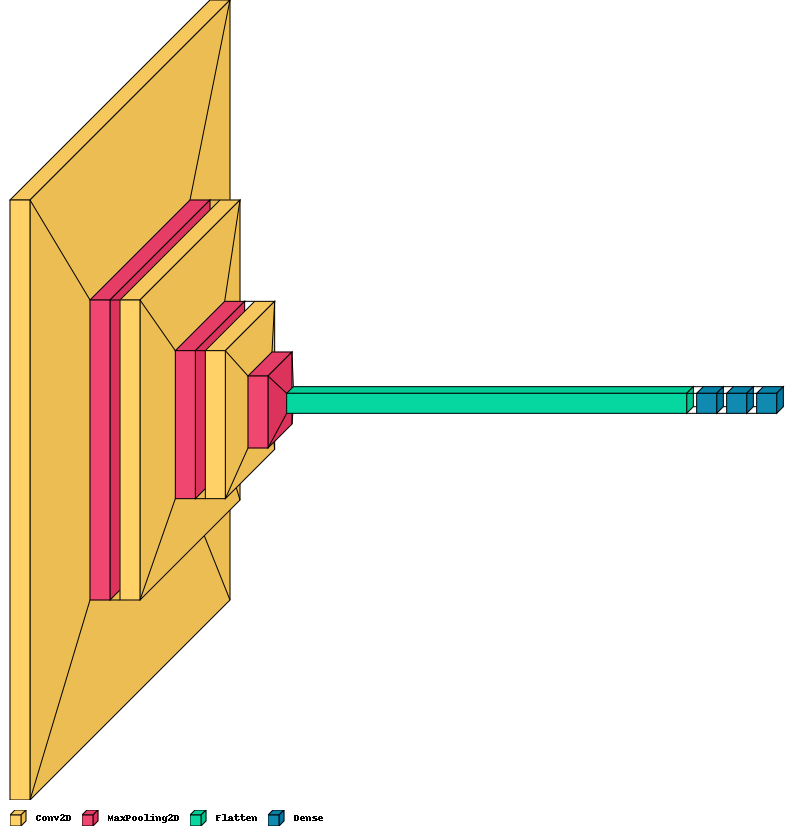

In [ ]:
visualkeras.layered_view(model, legend=True)

In [ ]:
history = model.fit(
    train_gen,
    epochs=30,
    validation_data=test_gen
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


12/12 [==============================] - 39s 2s/step - loss: 2.6641 - sparse_categorical_accuracy: 0.2772 - val_loss: 1.6248 - val_sparse_categorical_accuracy: 0.3071
Epoch 2/30
12/12 [==============================] - 25s 2s/step - loss: 1.6068 - sparse_categorical_accuracy: 0.3308 - val_loss: 1.4294 - val_sparse_categorical_accuracy: 0.3583
Epoch 3/30
12/12 [==============================] - 25s 2s/step - loss: 1.3996 - sparse_categorical_accuracy: 0.4053 - val_loss: 1.4479 - val_sparse_categorical_accuracy: 0.4055
Epoch 4/30
12/12 [==============================] - 25s 2s/step - loss: 1.3694 - sparse_categorical_accuracy: 0.4345 - val_loss: 1.3560 - val_sparse_categorical_accuracy: 0.3583
Epoch 5/30
12/12 [==============================] - 26s 2s/step - loss: 1.3077 - sparse_categorical_accuracy: 0.4735 - val_loss: 1.5465 - val_sparse_categorical_accuracy: 0.3740
Epoch 6/30
12/12 [==============================] - 25s 2s/step - loss: 1.2862 - sparse_categorical_accuracy: 0.4882 - va

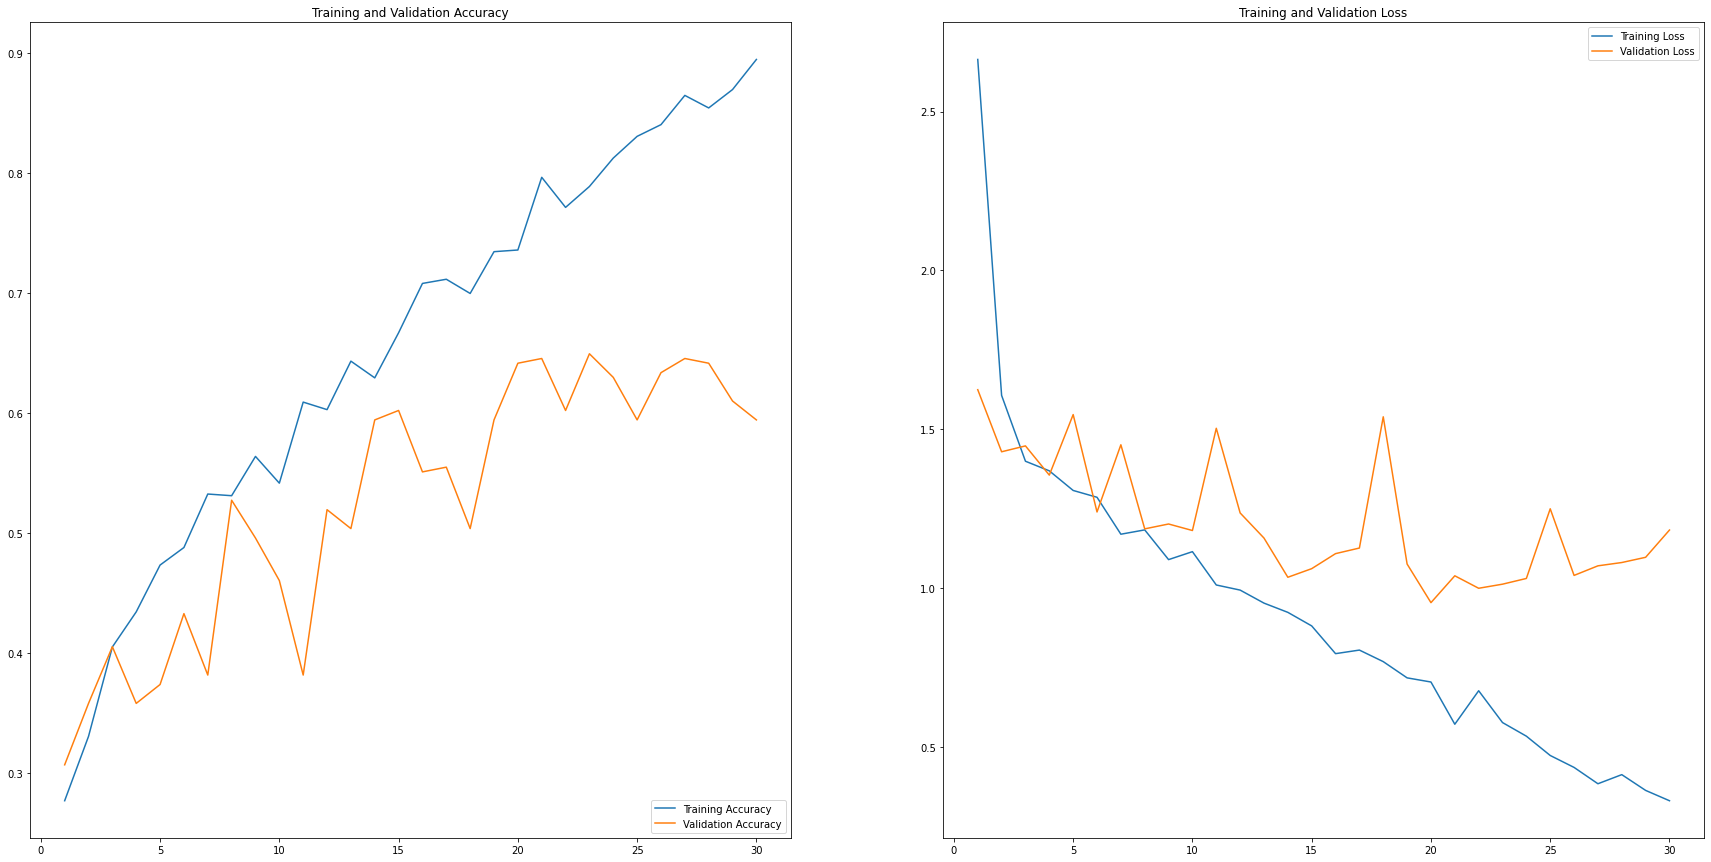

In [ ]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 1)
plt.plot([i for i in range(1,31)], acc, label='Training Accuracy')
plt.plot([i for i in range(1,31)], val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot([i for i in range(1,31)], loss, label='Training Loss')
plt.plot([i for i in range(1,31)], val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Παρατηρούμε ότι χωρίς augmentation, μετά το epoch 15, αρχίζουμε να έχουμε overfitting.

Παρακάτω εφαρμόζουμε ακριβώς την ίδια αρχιτεκτονική, αφού πρώτα έχουμε εφαρμόσει augmentation με vertical_flip, rotation_range=10, width_shift_range=.1, height_shift_range=.1, vertical_flip=True και zoom_range=0.2.
Αναμένουμε να έχουμε καλυτερα αποτελέσματα.

In [ ]:
data_generator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=10,
                    width_shift_range=.1,
                    height_shift_range=.1,
                    vertical_flip=True,
                    zoom_range=0.2
                    )
test_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_gen = data_generator.flow_from_directory(batch_size=batch_size,
                                                           directory='/content/ClassData/train',
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='sparse')
test_gen = test_generator.flow_from_directory(batch_size=batch_size,
                                                           directory='/content/ClassData/test',
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='sparse')

Found 1436 images belonging to 5 classes.
Found 254 images belonging to 5 classes.


In [ ]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(80, activation='relu'),
    Dense(100, activation='relu'),
    Dense(80, activation='softmax')


])

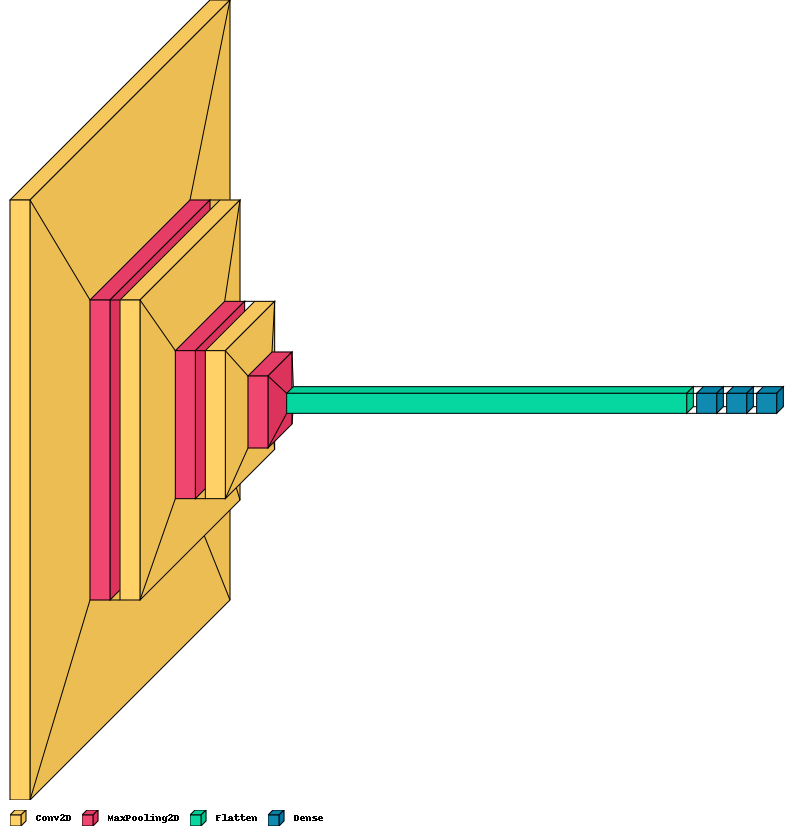

In [ ]:
visualkeras.layered_view(model, legend=True)

In [ ]:
model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tensorflow.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 37, 37, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 18, 18, 32)      

In [ ]:
history = model.fit(
    train_gen,
    epochs=30,
    validation_data=test_gen
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


12/12 [==============================] - 42s 2s/step - loss: 2.6748 - sparse_categorical_accuracy: 0.2326 - val_loss: 2.1810 - val_sparse_categorical_accuracy: 0.2441
Epoch 2/30
12/12 [==============================] - 31s 3s/step - loss: 1.6468 - sparse_categorical_accuracy: 0.3008 - val_loss: 1.3927 - val_sparse_categorical_accuracy: 0.4173
Epoch 3/30
12/12 [==============================] - 30s 2s/step - loss: 1.5228 - sparse_categorical_accuracy: 0.3210 - val_loss: 1.3538 - val_sparse_categorical_accuracy: 0.3976
Epoch 4/30
12/12 [==============================] - 30s 2s/step - loss: 1.4581 - sparse_categorical_accuracy: 0.3628 - val_loss: 1.3536 - val_sparse_categorical_accuracy: 0.4173
Epoch 5/30
12/12 [==============================] - 30s 3s/step - loss: 1.4019 - sparse_categorical_accuracy: 0.3983 - val_loss: 1.4285 - val_sparse_categorical_accuracy: 0.3661
Epoch 6/30
12/12 [==============================] - 31s 3s/step - loss: 1.4121 - sparse_categorical_accuracy: 0.4241 - va

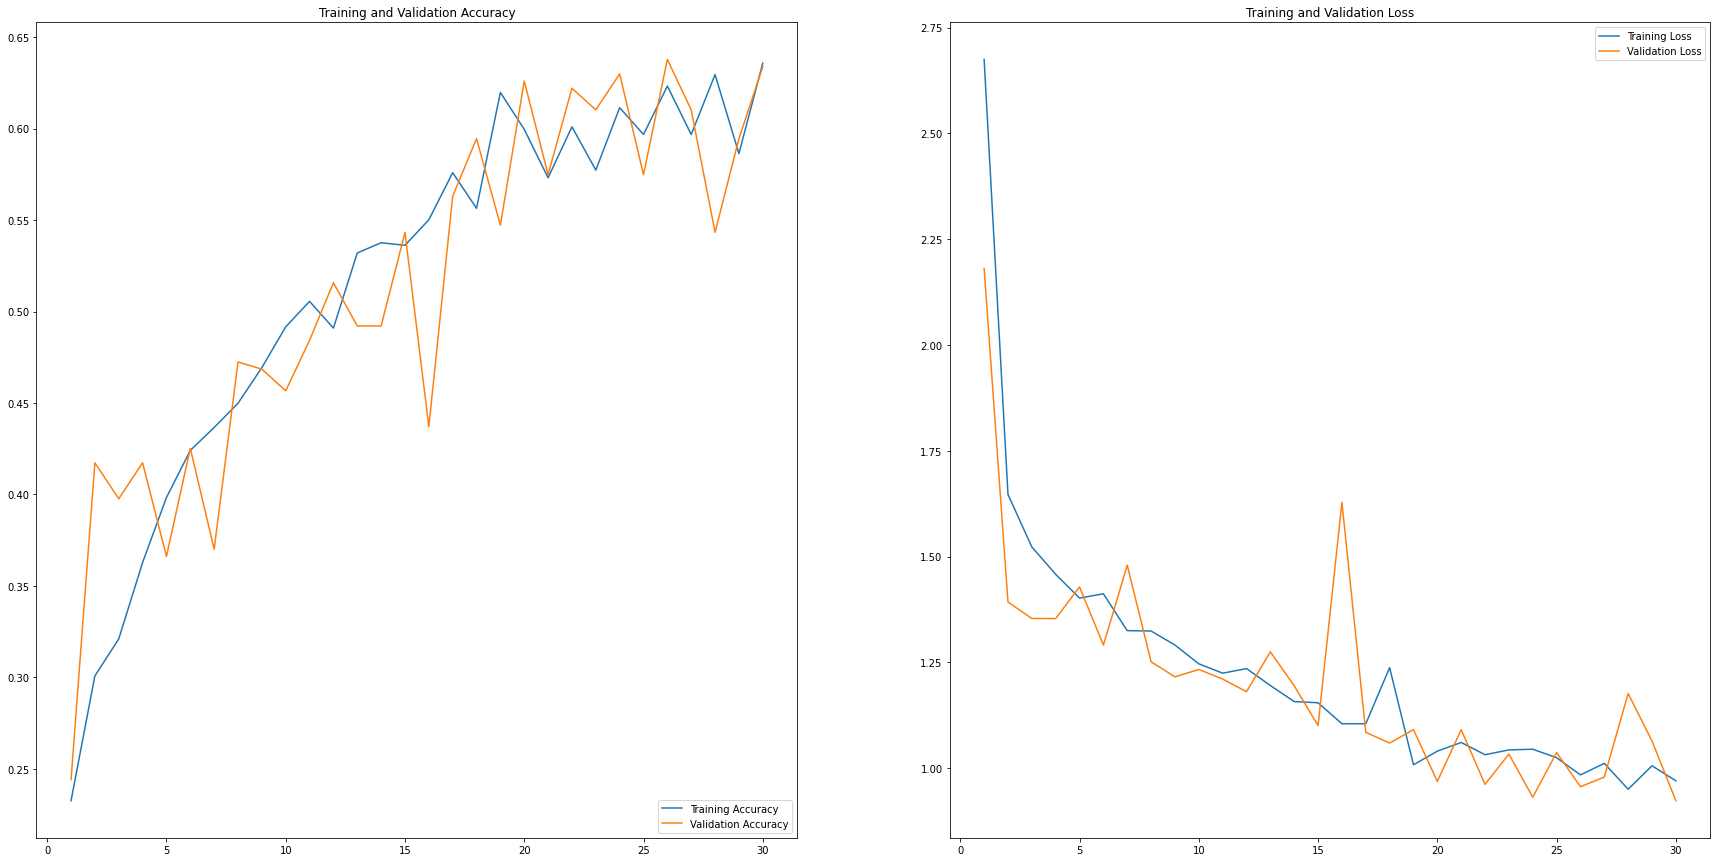

In [ ]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 1)
plt.plot([i for i in range(1,31)], acc, label='Training Accuracy')
plt.plot([i for i in range(1,31)], val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot([i for i in range(1,31)], loss, label='Training Loss')
plt.plot([i for i in range(1,31)], val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Βρίσκουμε ότι το overfitting σχεδόν εξαφανίζεται. Για το λόγο αυτό θα χρησιμοποιήσουμε και dropout μεταξύ των συνελικτικών επιπέδων.

In [ ]:
from tensorflow.keras.layers import AveragePooling2D

In [ ]:
data_generator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=10,
                    width_shift_range=.1,
                    height_shift_range=.1,
                    vertical_flip=True,
                    zoom_range=0.2
                    )
test_generator = ImageDataGenerator(rescale=1./255)
#------------------------------------------------------------------------------------------------
train_gen = data_generator.flow_from_directory(batch_size=batch_size,
                                                           directory='/content/ClassData/train',
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='sparse')
test_gen = test_generator.flow_from_directory(batch_size=batch_size,
                                                           directory='/content/ClassData/test',
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='sparse')

Found 1436 images belonging to 5 classes.
Found 254 images belonging to 5 classes.


In [ ]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(80, activation='relu'),
    Dense(100, activation='relu'),
    Dense(80, activation='softmax')
])

#-----------------------------------------------------------------------------------------------

model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tensorflow.keras.metrics.SparseCategoricalAccuracy()])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 75, 75, 16)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 32)       

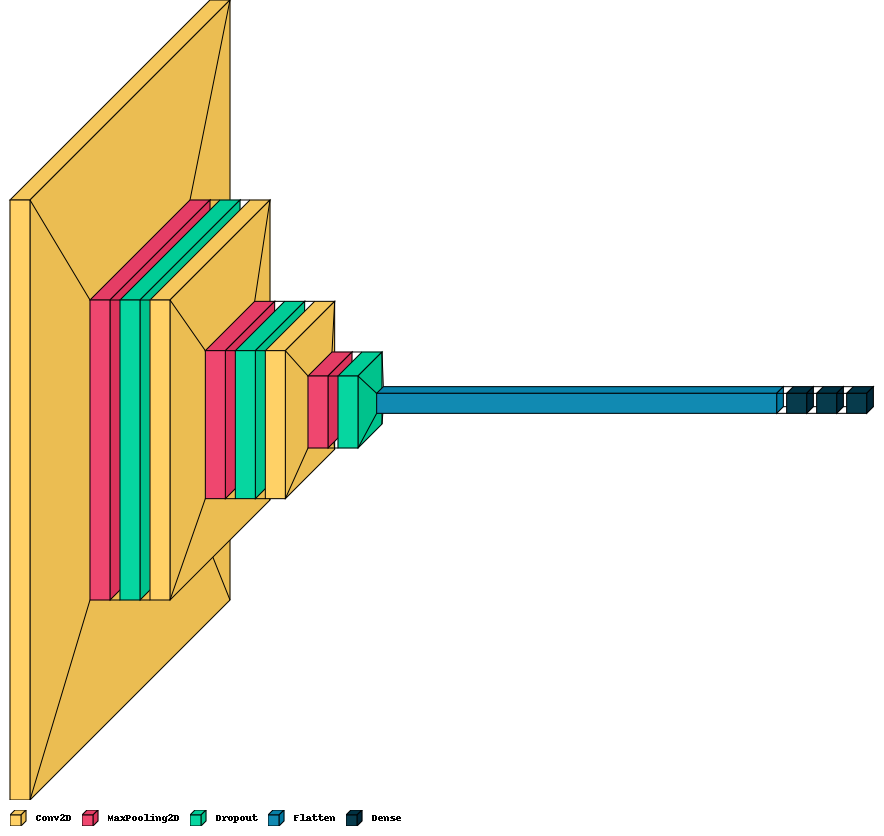

In [ ]:
visualkeras.layered_view(model, legend=True)

In [ ]:
history = model.fit(
    train_gen,
    epochs=30,
    validation_data=test_gen
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


12/12 [==============================] - 34s 3s/step - loss: 2.5382 - sparse_categorical_accuracy: 0.2173 - val_loss: 2.1649 - val_sparse_categorical_accuracy: 0.2638
Epoch 2/30
12/12 [==============================] - 29s 2s/step - loss: 1.7240 - sparse_categorical_accuracy: 0.2667 - val_loss: 1.7943 - val_sparse_categorical_accuracy: 0.3858
Epoch 3/30
12/12 [==============================] - 30s 3s/step - loss: 1.5866 - sparse_categorical_accuracy: 0.3141 - val_loss: 1.7869 - val_sparse_categorical_accuracy: 0.3976
Epoch 4/30
12/12 [==============================] - 30s 2s/step - loss: 1.4966 - sparse_categorical_accuracy: 0.3447 - val_loss: 1.5918 - val_sparse_categorical_accuracy: 0.4803
Epoch 5/30
12/12 [==============================] - 30s 2s/step - loss: 1.4894 - sparse_categorical_accuracy: 0.3712 - val_loss: 1.5936 - val_sparse_categorical_accuracy: 0.4488
Epoch 6/30
12/12 [==============================] - 29s 2s/step - loss: 1.4191 - sparse_categorical_accuracy: 0.3823 - va

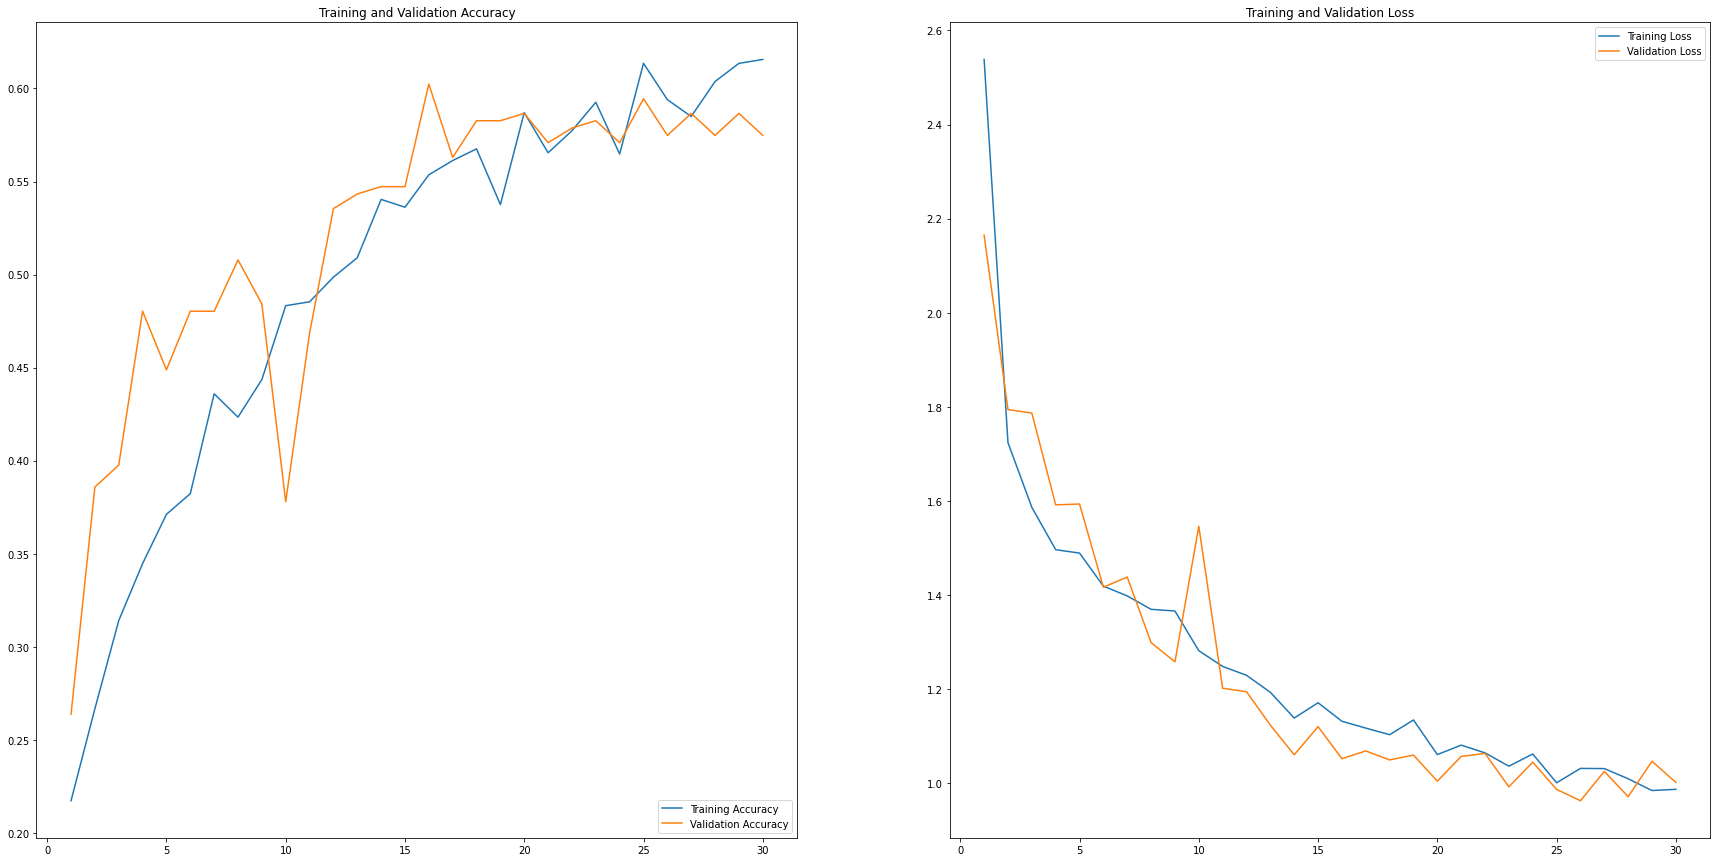

In [ ]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 1)
plt.plot([i for i in range(1,31)], acc, label='Training Accuracy')
plt.plot([i for i in range(1,31)], val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot([i for i in range(1,31)], loss, label='Training Loss')
plt.plot([i for i in range(1,31)], val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Βλάπουμε θετική επόδραση του dropout στο overfitting.

Παρακάτω δοκιμάζουμε AveragePooling αντί για MaxPooling.

In [ ]:
data_generator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=10,
                    width_shift_range=.1,
                    height_shift_range=.1,
                    vertical_flip=True,
                    zoom_range=0.2
                    )
test_generator = ImageDataGenerator(rescale=1./255)
#------------------------------------------------------------------------------------------------
train_gen = data_generator.flow_from_directory(batch_size=batch_size,
                                                           directory='/content/ClassData/train',
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='sparse')
test_gen = test_generator.flow_from_directory(batch_size=batch_size,
                                                           directory='/content/ClassData/test',
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='sparse')

Found 1436 images belonging to 5 classes.
Found 254 images belonging to 5 classes.


In [ ]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    AveragePooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    AveragePooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    AveragePooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(80, activation='relu'),
    Dense(100, activation='relu'),
    Dense(80, activation='softmax')
])

#-----------------------------------------------------------------------------------------------

model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tensorflow.keras.metrics.SparseCategoricalAccuracy()])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 average_pooling2d_5 (Averag  (None, 75, 75, 16)       0         
 ePooling2D)                                                     
                                                                 
 dropout_9 (Dropout)         (None, 75, 75, 16)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 average_pooling2d_6 (Averag  (None, 37, 37, 32)       0         
 ePooling2D)                                                     
                                                                 
 dropout_10 (Dropout)        (None, 37, 37, 32)       

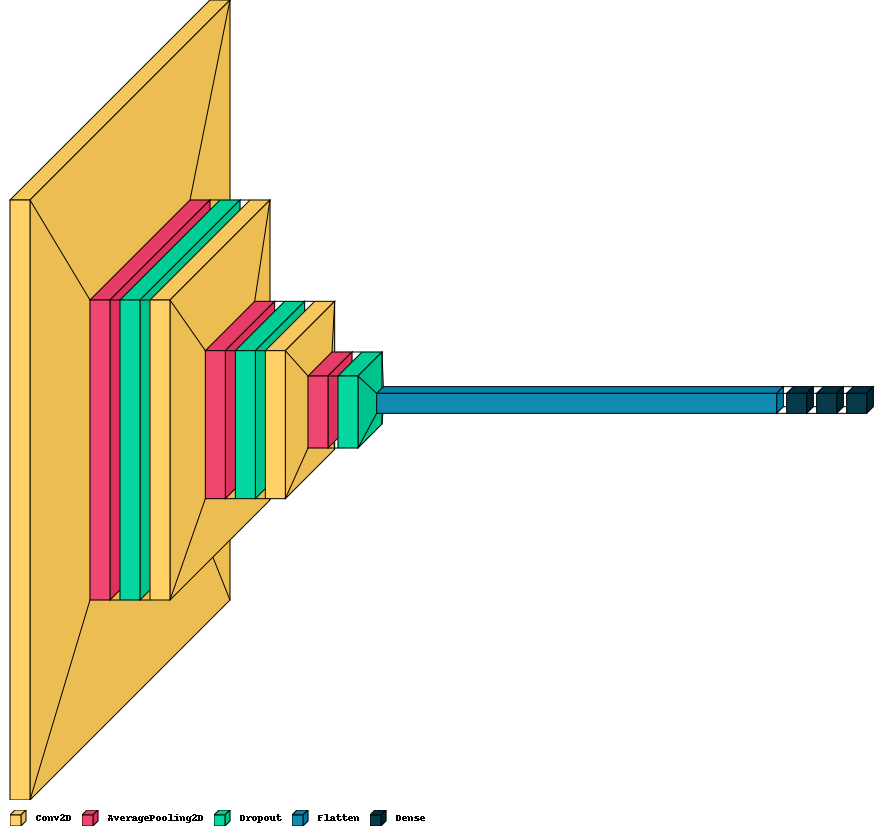

In [ ]:
visualkeras.layered_view(model, legend=True)

In [ ]:
history = model.fit(
    train_gen,
    epochs=30,
    validation_data=test_gen
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


12/12 [==============================] - 33s 3s/step - loss: 2.4362 - sparse_categorical_accuracy: 0.2375 - val_loss: 1.5675 - val_sparse_categorical_accuracy: 0.3110
Epoch 2/30
12/12 [==============================] - 30s 3s/step - loss: 1.5174 - sparse_categorical_accuracy: 0.3322 - val_loss: 1.3558 - val_sparse_categorical_accuracy: 0.4685
Epoch 3/30
12/12 [==============================] - 30s 3s/step - loss: 1.5368 - sparse_categorical_accuracy: 0.3600 - val_loss: 1.3412 - val_sparse_categorical_accuracy: 0.4449
Epoch 4/30
12/12 [==============================] - 30s 3s/step - loss: 1.3913 - sparse_categorical_accuracy: 0.4004 - val_loss: 1.3136 - val_sparse_categorical_accuracy: 0.4921
Epoch 5/30
12/12 [==============================] - 30s 2s/step - loss: 1.3895 - sparse_categorical_accuracy: 0.4102 - val_loss: 1.3958 - val_sparse_categorical_accuracy: 0.4134
Epoch 6/30
12/12 [==============================] - 30s 3s/step - loss: 1.3242 - sparse_categorical_accuracy: 0.4415 - va

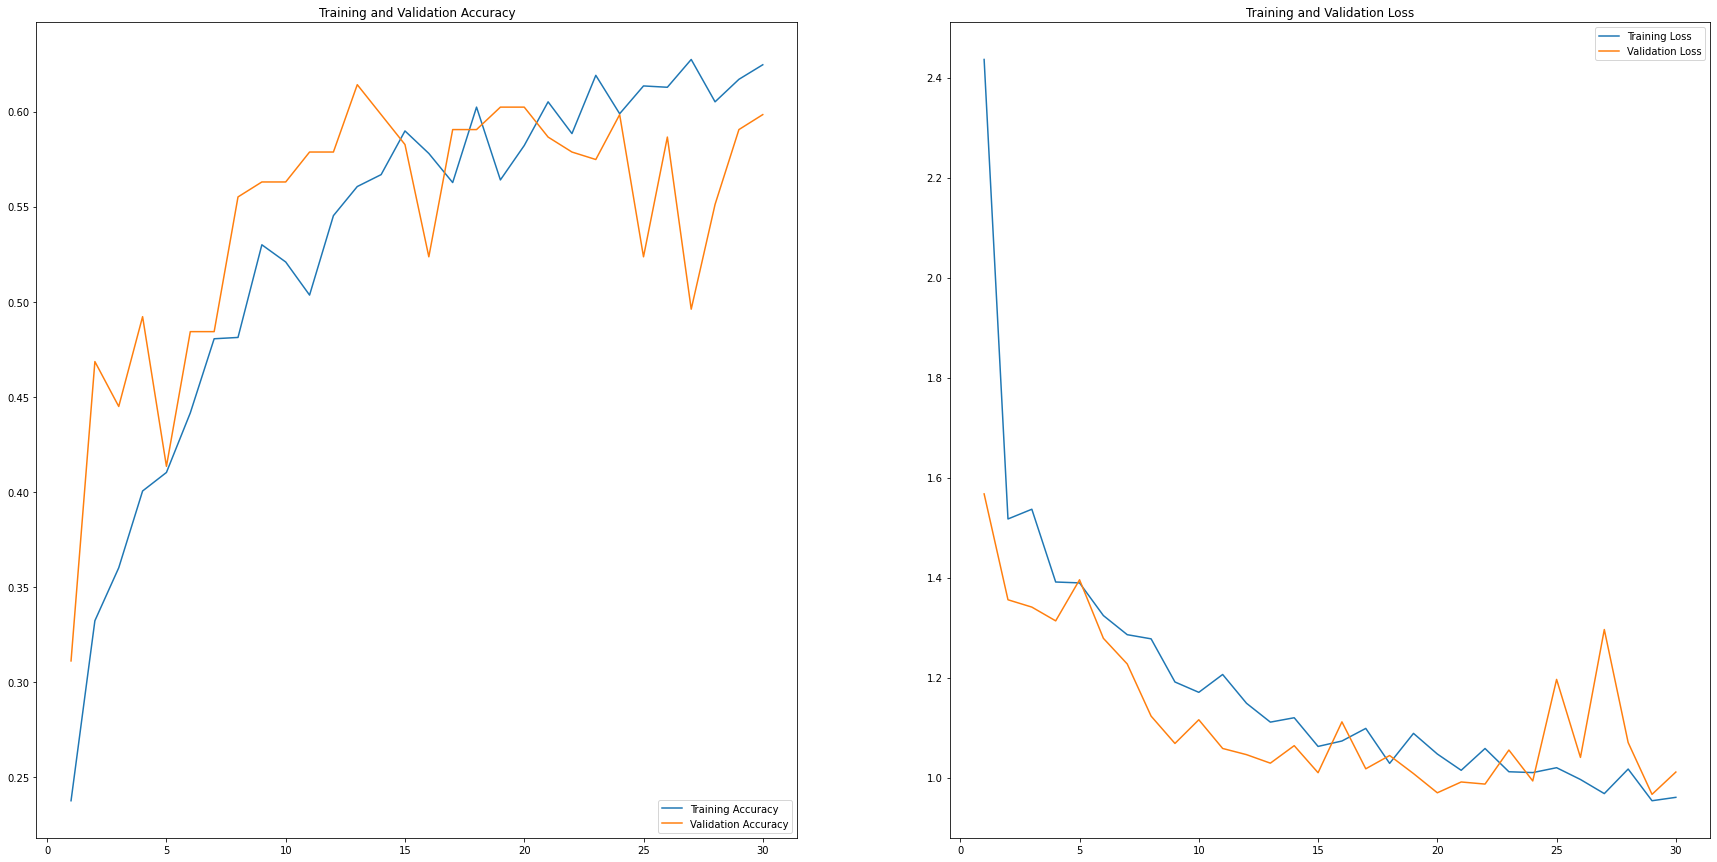

In [ ]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 1)
plt.plot([i for i in range(1,31)], acc, label='Training Accuracy')
plt.plot([i for i in range(1,31)], val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot([i for i in range(1,31)], loss, label='Training Loss')
plt.plot([i for i in range(1,31)], val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Παρατηρούμε ότι με χρήση AveragePooling αντί του MaxPooling δεν έχουμε ουσιαστικές αλλαγές.

Παρακάτω θα δοκιμάσουμε να βαθύνουμε το fully connected κομμάτι τη αρχιτεκτονικής μας.

In [ ]:
data_generator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=10,
                    width_shift_range=.1,
                    height_shift_range=.1,
                    vertical_flip=True,
                    zoom_range=0.2
                    )
test_generator = ImageDataGenerator(rescale=1./255)
#------------------------------------------------------------------------------------------------
train_gen = data_generator.flow_from_directory(batch_size=batch_size,
                                                           directory='/content/ClassData/train',
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='sparse')
test_gen = test_generator.flow_from_directory(batch_size=batch_size,
                                                           directory='/content/ClassData/test',
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='sparse')

Found 1436 images belonging to 5 classes.
Found 254 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.layers import AveragePooling2D
import tensorflow

In [ ]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    AveragePooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    AveragePooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    AveragePooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(80, activation='relu'),
    Dense(100, activation='relu'),
    Dense(80, activation='relu'),
    Dense(100, activation='relu'),
    Dense(80, activation='relu'),
    Dense(100, activation='relu'),
    Dense(80, activation='softmax')
])

#-----------------------------------------------------------------------------------------------

model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tensorflow.keras.metrics.SparseCategoricalAccuracy()])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 average_pooling2d_3 (Averag  (None, 75, 75, 16)       0         
 ePooling2D)                                                     
                                                                 
 dropout_6 (Dropout)         (None, 75, 75, 16)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 average_pooling2d_4 (Averag  (None, 37, 37, 32)       0         
 ePooling2D)                                                     
                                                                 
 dropout_7 (Dropout)         (None, 37, 37, 32)       

In [ ]:
import visualkeras

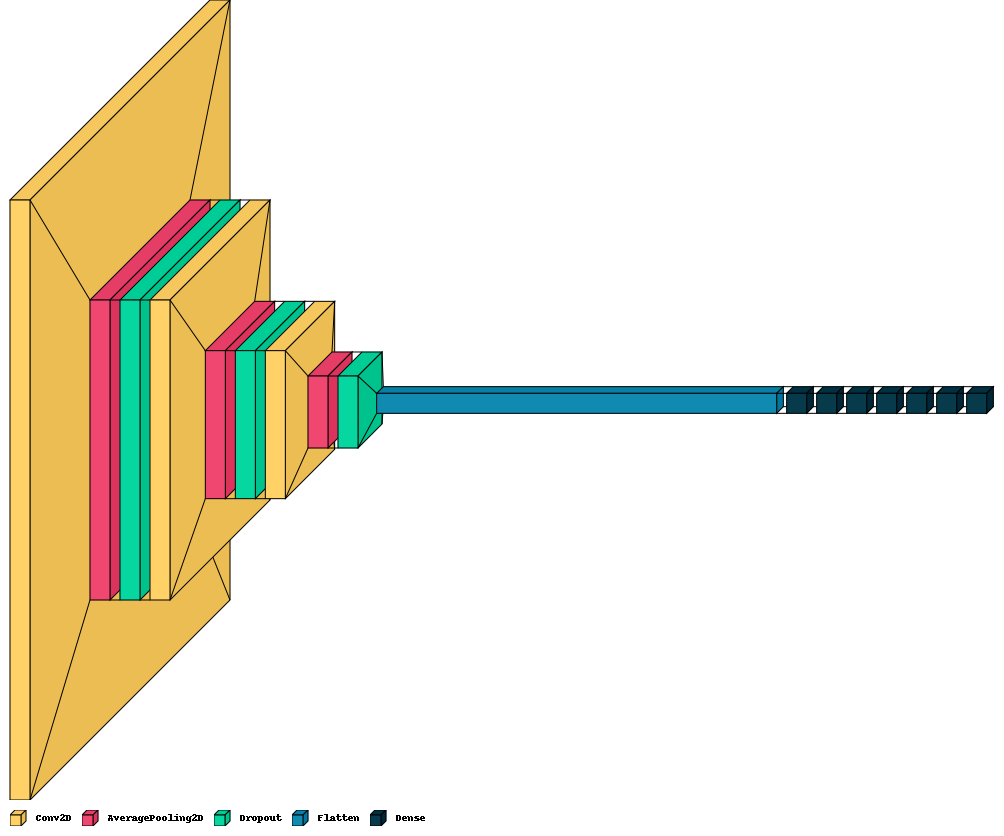

In [ ]:
visualkeras.layered_view(model, legend=True)

In [ ]:
history = model.fit(
    train_gen,
    epochs=30,
    validation_data=test_gen
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


12/12 [==============================] - 45s 3s/step - loss: 3.1707 - sparse_categorical_accuracy: 0.2465 - val_loss: 1.7874 - val_sparse_categorical_accuracy: 0.2953
Epoch 2/30
12/12 [==============================] - 31s 3s/step - loss: 1.8407 - sparse_categorical_accuracy: 0.2542 - val_loss: 1.8204 - val_sparse_categorical_accuracy: 0.2205
Epoch 3/30
12/12 [==============================] - 31s 3s/step - loss: 1.6628 - sparse_categorical_accuracy: 0.2751 - val_loss: 1.5588 - val_sparse_categorical_accuracy: 0.3150
Epoch 4/30
12/12 [==============================] - 32s 3s/step - loss: 1.5915 - sparse_categorical_accuracy: 0.3106 - val_loss: 1.6845 - val_sparse_categorical_accuracy: 0.2677
Epoch 5/30
12/12 [==============================] - 31s 3s/step - loss: 1.5979 - sparse_categorical_accuracy: 0.3531 - val_loss: 1.5249 - val_sparse_categorical_accuracy: 0.3543
Epoch 6/30
12/12 [==============================] - 31s 3s/step - loss: 1.5056 - sparse_categorical_accuracy: 0.3120 - va

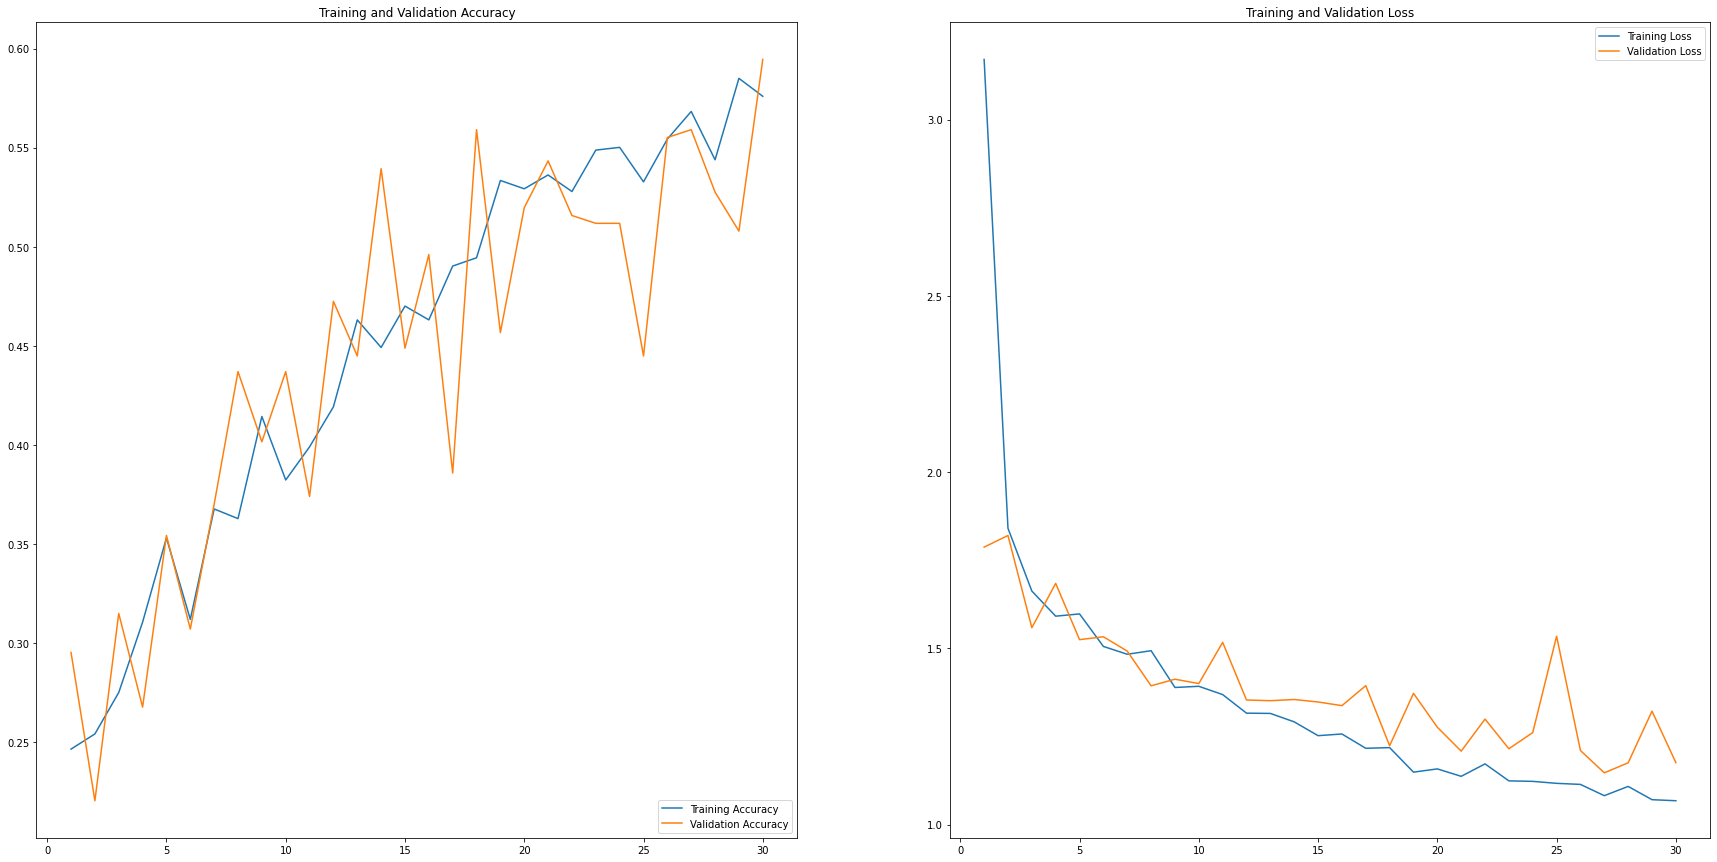

In [ ]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 1)
plt.plot([i for i in range(1,31)], acc, label='Training Accuracy')
plt.plot([i for i in range(1,31)], val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot([i for i in range(1,31)], loss, label='Training Loss')
plt.plot([i for i in range(1,31)], val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Παρατηρούμε ότι η σύγκλιση της καμπύλης κόστους για το train είναι σχεδόν γραμμική, σε αντίθεση με αυτή προηγούμενων δοκιμών, γεγονός που μας οδηγεί στο συμπέρασμα ότι η χρήση περισσότερων layers στο fully connected καθιστά τη σύγκλιση πιο αργή (έχουμε κρατήσει σταθερά τον RMSprop ως optimizer, γιατί φαίνεται να αποδίδει καλά στις προηγούμενες περιπτώσεις). Ταυτόχρονα, απ΄τη σύγκριση καμπυλών κόστους του train και του test, θεωρούμε ότι υπάρχει μια τάση για overfitting. Ως εκ τούτου συνεχίζουμε τους πειραματισμούς μας με λιγότερα hidden layers στο fully connected κομμάτι της αρχιτεκτονικής μας.

Παρακάτω εφαρμόζουμε 'same' padding στο προ-προηγούμενο δίκτυο.

In [ ]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    AveragePooling2D(padding='same'),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    AveragePooling2D(padding='same'),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    AveragePooling2D(padding='same'),
    Dropout(0.2),
    Flatten(),
    Dense(80, activation='relu'),
    Dense(100, activation='relu'),
    Dense(80, activation='softmax')
])

#-----------------------------------------------------------------------------------------------

model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tensorflow.keras.metrics.SparseCategoricalAccuracy()])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 average_pooling2d_7 (Averag  (None, 75, 75, 16)       0         
 ePooling2D)                                                     
                                                                 
 dropout_10 (Dropout)        (None, 75, 75, 16)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 average_pooling2d_8 (Averag  (None, 38, 38, 32)       0         
 ePooling2D)                                                     
                                                                 
 dropout_11 (Dropout)        (None, 38, 38, 32)       

Παρατηρούμε ότι οι προς εκτίμηση παράμετροι αυξήθηκαν κατά περίπου 90 χιλιάδες.

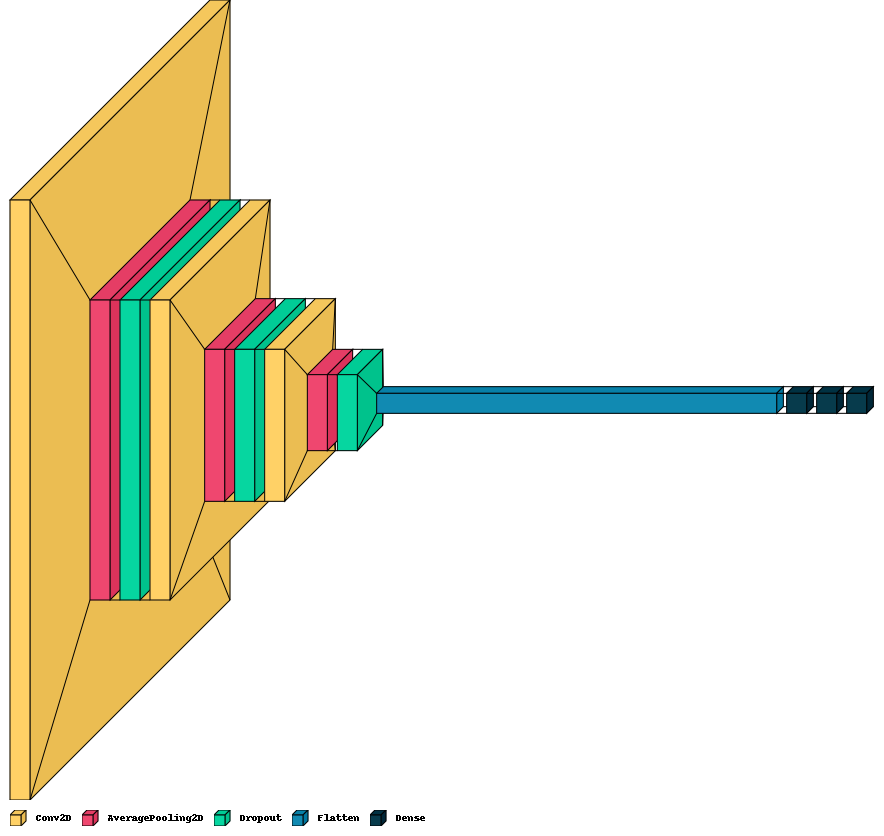

In [ ]:
visualkeras.layered_view(model, legend=True)

In [ ]:
history = model.fit(
    train_gen,
    epochs=30,
    validation_data=test_gen
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


12/12 [==============================] - 34s 3s/step - loss: 2.5271 - sparse_categorical_accuracy: 0.2368 - val_loss: 1.9116 - val_sparse_categorical_accuracy: 0.2205
Epoch 2/30
12/12 [==============================] - 32s 3s/step - loss: 1.6085 - sparse_categorical_accuracy: 0.3057 - val_loss: 1.5335 - val_sparse_categorical_accuracy: 0.2795
Epoch 3/30
12/12 [==============================] - 33s 3s/step - loss: 1.5119 - sparse_categorical_accuracy: 0.3322 - val_loss: 1.4244 - val_sparse_categorical_accuracy: 0.3622
Epoch 4/30
12/12 [==============================] - 31s 3s/step - loss: 1.4957 - sparse_categorical_accuracy: 0.3635 - val_loss: 1.3926 - val_sparse_categorical_accuracy: 0.4409
Epoch 5/30
12/12 [==============================] - 31s 3s/step - loss: 1.3904 - sparse_categorical_accuracy: 0.3976 - val_loss: 1.3841 - val_sparse_categorical_accuracy: 0.3976
Epoch 6/30
12/12 [==============================] - 31s 3s/step - loss: 1.3705 - sparse_categorical_accuracy: 0.4464 - va

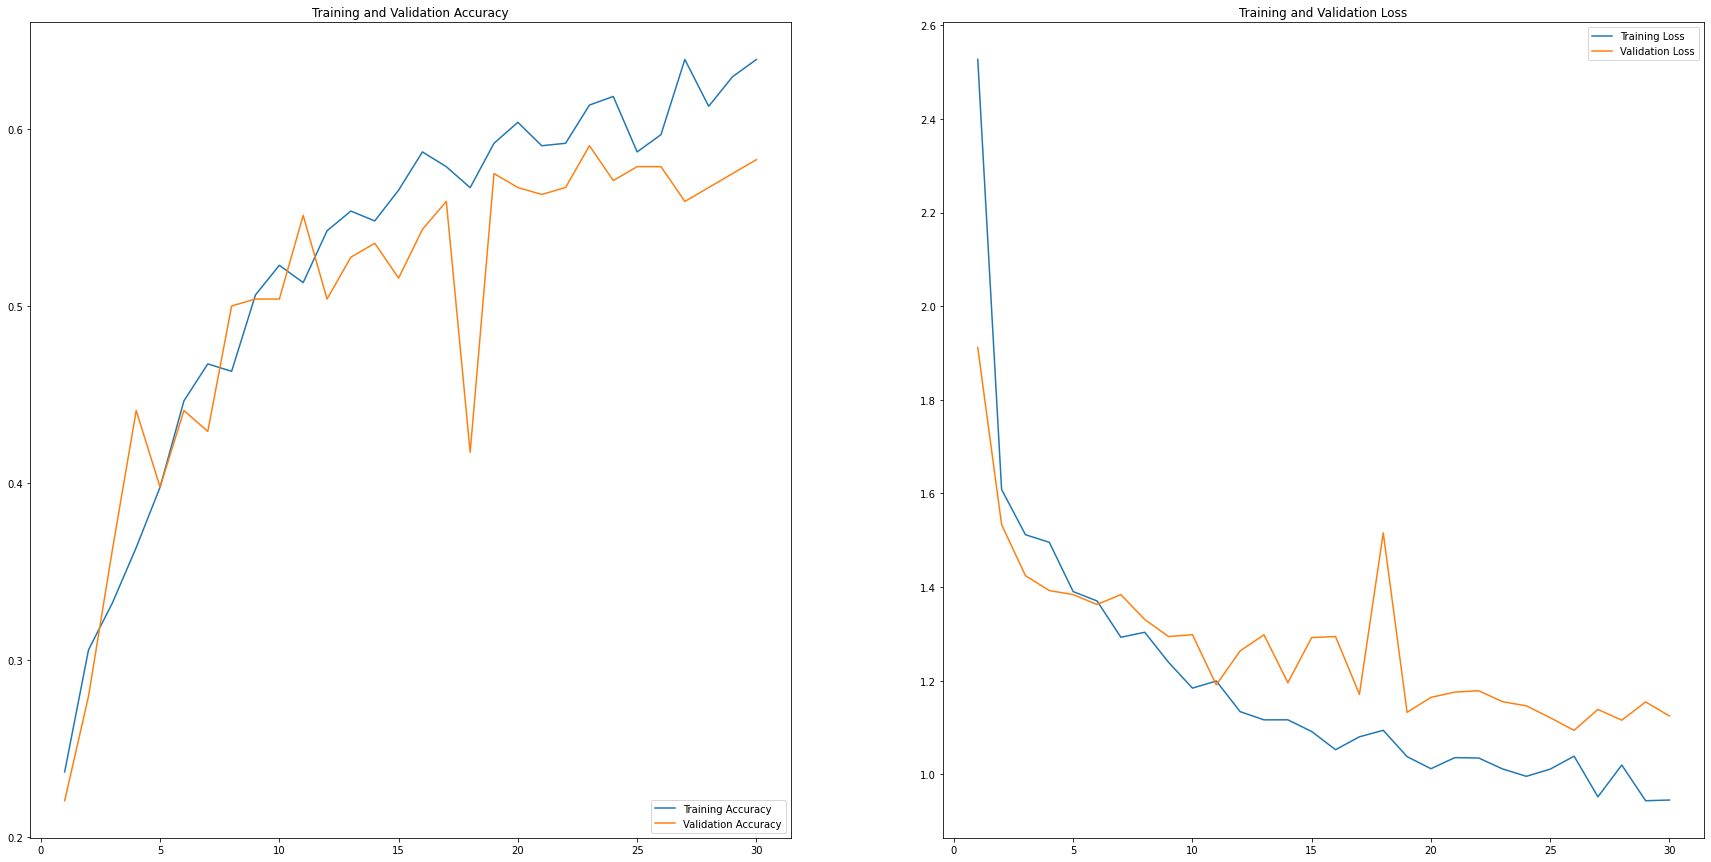

In [ ]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 1)
plt.plot([i for i in range(1,31)], acc, label='Training Accuracy')
plt.plot([i for i in range(1,31)], val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot([i for i in range(1,31)], loss, label='Training Loss')
plt.plot([i for i in range(1,31)], val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Παρατηρούμε ότι προφανώς η τελευταία αλλαγή δεν συνεισέφεραι πουθενά, αλλά αντιθέτως μας δημιούργησε πρόβλημα με το overfitting. Ως εκ τούτου το padding στα filter layers θα παραμείνουν στο default το οποίο είναι 'valid'.

Παρακάτω θα δοκιμάσουμε να αυξήσουμε το μέγεθος των συνελικτικών επιπέδων απ' την default τιμή (2,2) σε (5,5).

In [ ]:
import tensorflow

In [ ]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    AveragePooling2D(pool_size=(5,5)),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    AveragePooling2D(pool_size=(5,5)),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    AveragePooling2D(pool_size=(5,5)),
    Dropout(0.2),
    Flatten(),
    Dense(80, activation='relu'),
    Dense(100, activation='relu'),
    Dense(5, activation='softmax')
])

#-----------------------------------------------------------------------------------------------

model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tensorflow.keras.metrics.SparseCategoricalAccuracy()])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 average_pooling2d_6 (Averag  (None, 30, 30, 16)       0         
 ePooling2D)                                                     
                                                                 
 dropout_6 (Dropout)         (None, 30, 30, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        4640      
                                                                 
 average_pooling2d_7 (Averag  (None, 6, 6, 32)         0         
 ePooling2D)                                                     
                                                                 
 dropout_7 (Dropout)         (None, 6, 6, 32)         

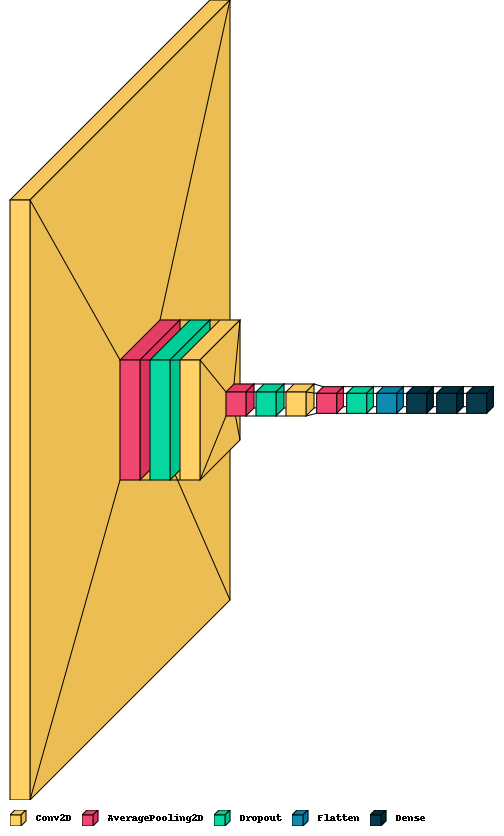

In [ ]:
visualkeras.layered_view(model, legend=True)

In [ ]:
history = model.fit(
    train_gen,
    epochs=30,
    validation_data=test_gen
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


12/12 [==============================] - 32s 3s/step - loss: 1.5722 - sparse_categorical_accuracy: 0.2458 - val_loss: 1.5147 - val_sparse_categorical_accuracy: 0.3110
Epoch 2/30
12/12 [==============================] - 30s 2s/step - loss: 1.5494 - sparse_categorical_accuracy: 0.2786 - val_loss: 1.4957 - val_sparse_categorical_accuracy: 0.3819
Epoch 3/30
12/12 [==============================] - 30s 2s/step - loss: 1.5253 - sparse_categorical_accuracy: 0.3357 - val_loss: 1.4353 - val_sparse_categorical_accuracy: 0.3937
Epoch 4/30
12/12 [==============================] - 30s 3s/step - loss: 1.4954 - sparse_categorical_accuracy: 0.3280 - val_loss: 1.4211 - val_sparse_categorical_accuracy: 0.3661
Epoch 5/30
12/12 [==============================] - 30s 3s/step - loss: 1.4422 - sparse_categorical_accuracy: 0.3830 - val_loss: 1.3636 - val_sparse_categorical_accuracy: 0.4055
Epoch 6/30
12/12 [==============================] - 30s 2s/step - loss: 1.4204 - sparse_categorical_accuracy: 0.3795 - va

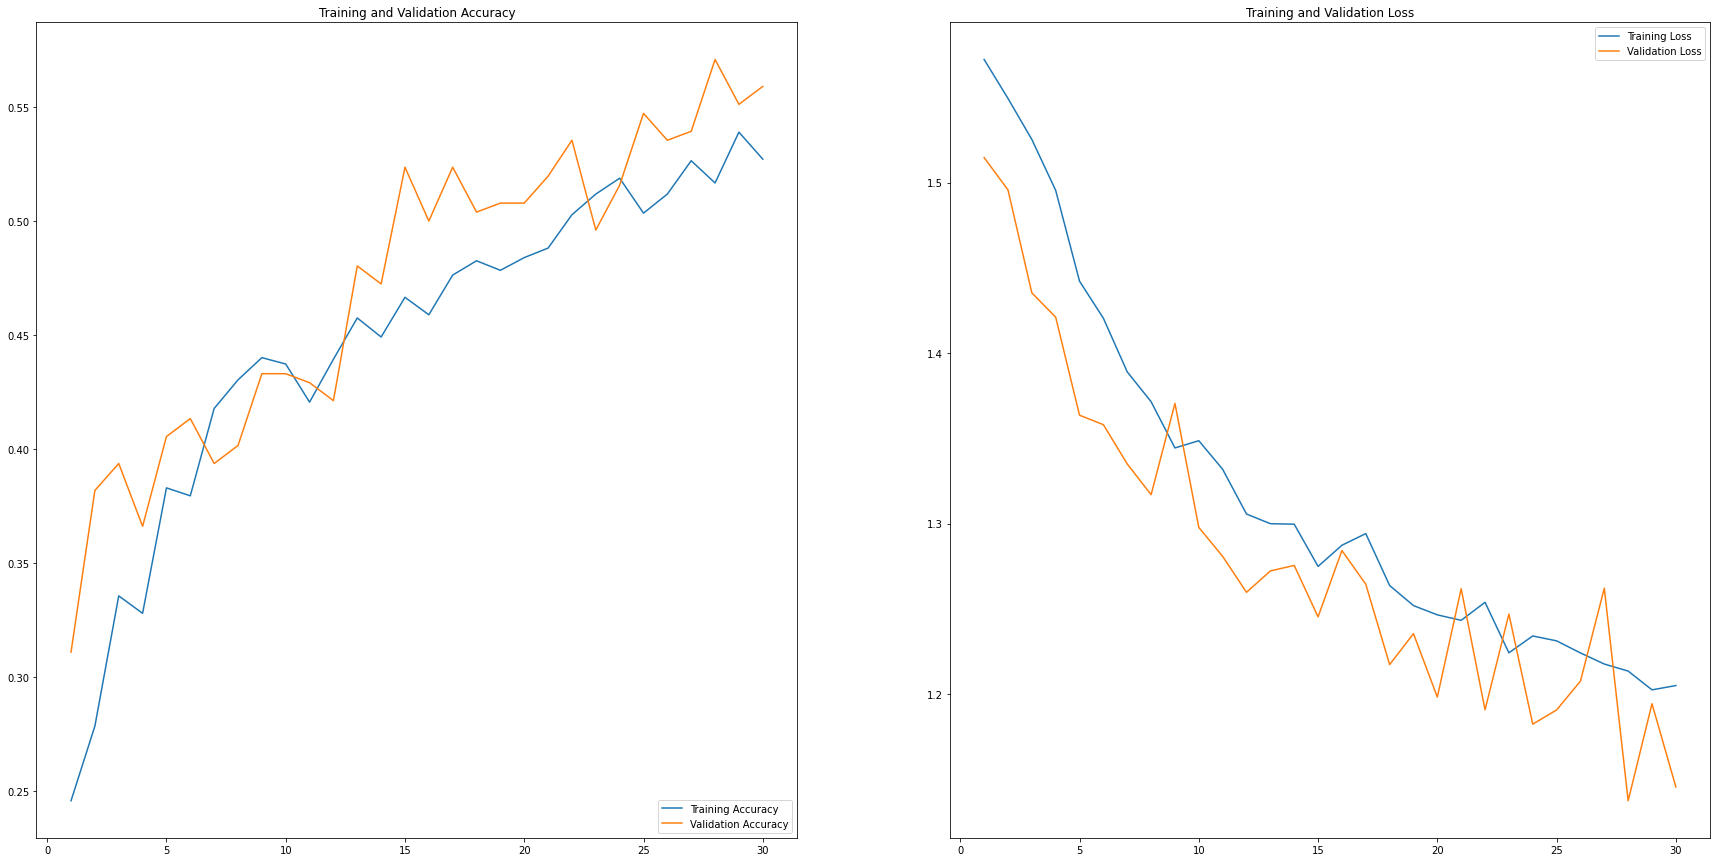

In [ ]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 1)
plt.plot([i for i in range(1,31)], acc, label='Training Accuracy')
plt.plot([i for i in range(1,31)], val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot([i for i in range(1,31)], loss, label='Training Loss')
plt.plot([i for i in range(1,31)], val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    AveragePooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    AveragePooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    AveragePooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(80, activation='relu'),
    Dense(100, activation='relu'),
    Dense(5, activation='softmax')
])

#-----------------------------------------------------------------------------------------------

model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tensorflow.keras.metrics.SparseCategoricalAccuracy()])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 average_pooling2d_9 (Averag  (None, 75, 75, 16)       0         
 ePooling2D)                                                     
                                                                 
 dropout_9 (Dropout)         (None, 75, 75, 16)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 average_pooling2d_10 (Avera  (None, 37, 37, 32)       0         
 gePooling2D)                                                    
                                                                 
 dropout_10 (Dropout)        (None, 37, 37, 32)       

In [ ]:
history = model.fit(
    train_gen,
    epochs=30,
    validation_data=test_gen
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


12/12 [==============================] - 33s 3s/step - loss: 1.5692 - sparse_categorical_accuracy: 0.2946 - val_loss: 1.3989 - val_sparse_categorical_accuracy: 0.4173
Epoch 2/30
12/12 [==============================] - 30s 2s/step - loss: 1.4285 - sparse_categorical_accuracy: 0.3948 - val_loss: 1.3421 - val_sparse_categorical_accuracy: 0.3976
Epoch 3/30
12/12 [==============================] - 30s 3s/step - loss: 1.3589 - sparse_categorical_accuracy: 0.4318 - val_loss: 1.2810 - val_sparse_categorical_accuracy: 0.4606
Epoch 4/30
12/12 [==============================] - 30s 2s/step - loss: 1.2598 - sparse_categorical_accuracy: 0.4721 - val_loss: 1.1897 - val_sparse_categorical_accuracy: 0.5118
Epoch 5/30
12/12 [==============================] - 29s 2s/step - loss: 1.2661 - sparse_categorical_accuracy: 0.4798 - val_loss: 1.1502 - val_sparse_categorical_accuracy: 0.5630
Epoch 6/30
12/12 [==============================] - 30s 2s/step - loss: 1.1907 - sparse_categorical_accuracy: 0.5174 - va

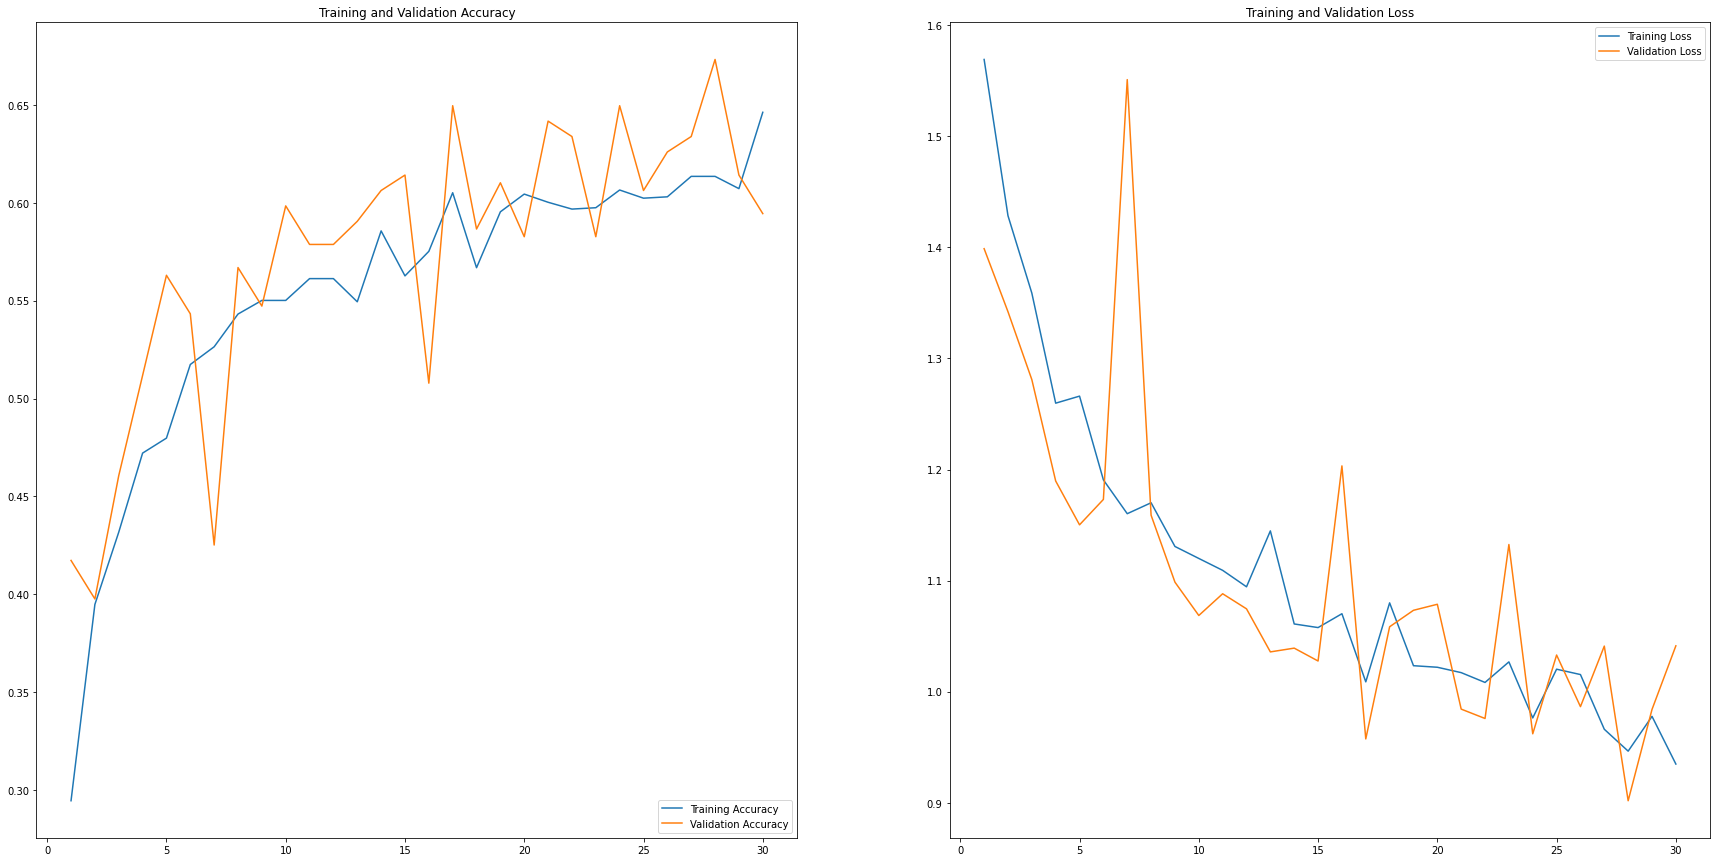

In [ ]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 1)
plt.plot([i for i in range(1,31)], acc, label='Training Accuracy')
plt.plot([i for i in range(1,31)], val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot([i for i in range(1,31)], loss, label='Training Loss')
plt.plot([i for i in range(1,31)], val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model = Sequential([
    Conv2D(32, 10, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    AveragePooling2D(),
    Dropout(0.2),
    Conv2D(32, 10, padding='same', activation='relu'),
    AveragePooling2D(),
    Dropout(0.2),
    Conv2D(32, 10, padding='same', activation='relu'),
    AveragePooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(80, activation='relu'),
    Dense(100, activation='relu'),
    Dense(5, activation='softmax')
])

#-----------------------------------------------------------------------------------------------

model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tensorflow.keras.metrics.SparseCategoricalAccuracy()])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      9632      
                                                                 
 average_pooling2d_12 (Avera  (None, 75, 75, 32)       0         
 gePooling2D)                                                    
                                                                 
 dropout_12 (Dropout)        (None, 75, 75, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 75, 32)        102432    
                                                                 
 average_pooling2d_13 (Avera  (None, 37, 37, 32)       0         
 gePooling2D)                                                    
                                                                 
 dropout_13 (Dropout)        (None, 37, 37, 32)       

In [ ]:
history = model.fit(
    train_gen,
    epochs=30,
    validation_data=test_gen
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


12/12 [==============================] - 35s 3s/step - loss: 6.4667 - sparse_categorical_accuracy: 0.2563 - val_loss: 1.5368 - val_sparse_categorical_accuracy: 0.2953
Epoch 2/30
12/12 [==============================] - 30s 3s/step - loss: 1.5700 - sparse_categorical_accuracy: 0.2591 - val_loss: 1.5544 - val_sparse_categorical_accuracy: 0.3071
Epoch 3/30
12/12 [==============================] - 31s 3s/step - loss: 1.5574 - sparse_categorical_accuracy: 0.2862 - val_loss: 1.5055 - val_sparse_categorical_accuracy: 0.4094
Epoch 4/30
12/12 [==============================] - 31s 3s/step - loss: 1.7464 - sparse_categorical_accuracy: 0.3127 - val_loss: 1.5537 - val_sparse_categorical_accuracy: 0.2244
Epoch 5/30
12/12 [==============================] - 30s 3s/step - loss: 1.5934 - sparse_categorical_accuracy: 0.2604 - val_loss: 1.5475 - val_sparse_categorical_accuracy: 0.2992
Epoch 6/30
12/12 [==============================] - 30s 3s/step - loss: 1.8349 - sparse_categorical_accuracy: 0.2765 - va

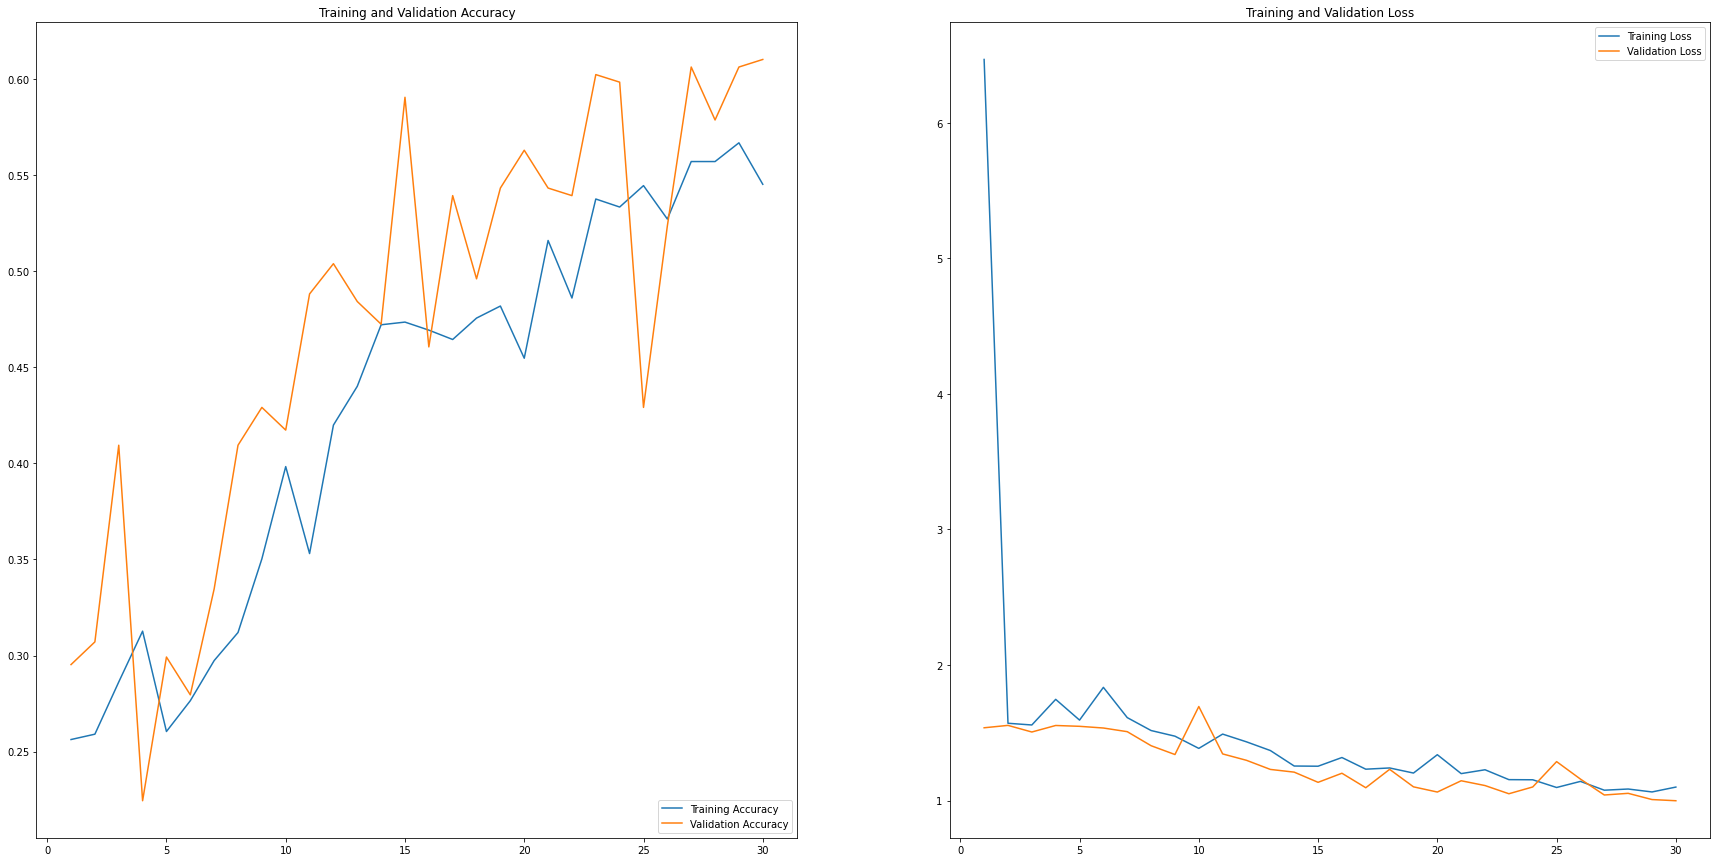

In [ ]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 1)
plt.plot([i for i in range(1,31)], acc, label='Training Accuracy')
plt.plot([i for i in range(1,31)], val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot([i for i in range(1,31)], loss, label='Training Loss')
plt.plot([i for i in range(1,31)], val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()